In [1]:
from transformer_payne import TransformerPayne
import matplotlib.pyplot as plt
import numpy as np

/Users/majajablonska/miniconda/envs/astro/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/Users/majajablonska/miniconda/envs/astro/lib/python3.10/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


The model will be downloaded from the HuggingFace hub if it wasn't found in the passed cache directory (default=```'.cache'```).

In [2]:
model = TransformerPayne.download()

/Users/majajablonska/Documents/Workspace/transformer_payne/src/transformer_payne/transformer_payne.py:121: UserWarning: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte Downloading the model from HuggingFace.
  warnings.warn(str(e) + " Downloading the model from HuggingFace.")


This is all you need! You can now work with spectra by passing in the:
- logarithms of wavelengths in [log($\AA$)]
- spectral parameter values (refer to ```model.parameter_names```)
- $\mu$ - cosine of the angle between the radius and the line-of-sight

In [3]:
log_wave = np.linspace(np.log10(4500), np.log10(4600), 1000)
spectral_parameters = np.ones(94)*0.5
mu = np.array([1.0])

# First call is longer as a function gets compiled
%time y = model(log_wave, mu, spectral_parameters)

CPU times: user 15.3 s, sys: 1.34 s, total: 16.6 s
Wall time: 18.8 s


In [4]:
# now when the function is compiled, for given log_wave.shape then the function is faster
%time y = model(log_wave, mu, spectral_parameters)

CPU times: user 2.46 s, sys: 131 ms, total: 2.59 s
Wall time: 3.41 s


The ```IntensityEmulator``` models return a 2D array - containing a continuum and full intensity.

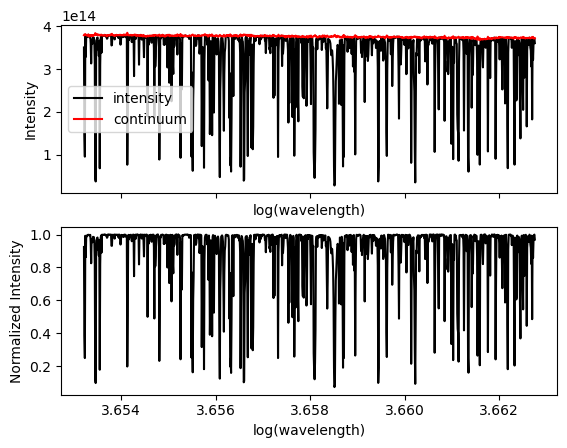

In [5]:
fig, axs = plt.subplots(2, sharex=True)
axs[0].plot(log_wave, y[:,0], color='black', label='intensity')
axs[0].plot(log_wave, y[:,1], color='red', label='continuum')
axs[1].plot(log_wave, y[:,0]/y[:,1], color='black')

axs[0].set_xlabel("log(wavelength)")
axs[0].set_ylabel("Intensity")
axs[1].set_xlabel("log(wavelength)")
axs[1].set_ylabel("Normalized Intensity")
axs[0].legend()

plt.show()